# Эффекты алиасинга

### 1D сигналы

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift, rfft, fftfreq

Демонстрация неудачной дискретизации.

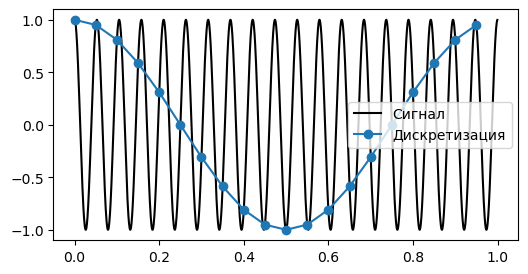

In [2]:
fs=20
T = 1
n = fs*T
w = 19

t = np.linspace(0, 1, 100*fs, endpoint=False)
sig = np.cos(2*np.pi*w*t)
discrete_t = np.linspace(0, 1, fs, endpoint=False)
discrete_sig = np.cos(2*np.pi*w*discrete_t)

plt.figure(figsize=(6,3))
plt.plot(t, sig, 'k')
plt.plot(discrete_t, discrete_sig, 'o-')
plt.legend(['Сигнал', 'Дискретизация'], loc='best')

Ниже код для вывода графиков сигнала и спектра

In [13]:
def myDFT_AmplPlot(t, x, N=512, fs = None, xLim = 0.5):    
    if len(x)>512:
        N = len(x)
        
    xFFT = fftshift(fft(x, N))
    # Амплитуда спектра
    xA = np.abs(xFFT)
    
    if fs == None:
        fs = 1    
    freqs = fftshift(fftfreq(N, d = 1/fs))
    # Графики
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 2, 1)
    plt.title('Сигнал')
    plt.plot(t, x)
    plt.xlabel('Временные отсчёты')

    plt.subplot(1, 2, 2)
    plt.plot(freqs,xA)
    plt.xlabel('Частоты')
    plt.xlim([0, fs*xLim])
    plt.xticks(np.linspace(0, fs*xLim, 11))
    plt.grid()
    plt.tight_layout()

Демонстрация алиасинга на аудио-сигналах

In [15]:
fs=8000
T = 1
n = fs*T
w1 = 500
w2 = 3500

t = np.linspace(0, 1, n, endpoint=False)
x = np.sin(2*np.pi*w1*t) + np.cos(2*np.pi*w2*t)

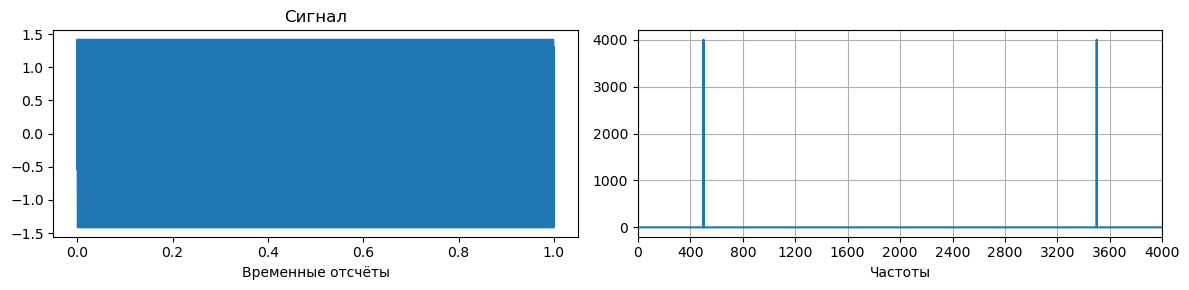

In [17]:
myDFT_AmplPlot(t, x, fs = fs)

In [19]:
import IPython
IPython.display.Audio(x,rate=fs)
#IPython.display.Audio("LetsGo.wav")

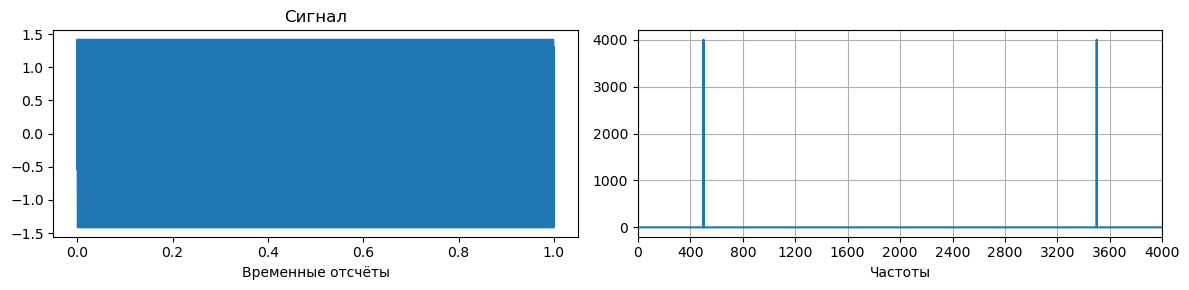

In [21]:
w1 = 500
w2 = 4500

t = np.linspace(0, 1, n, endpoint=False)
x = np.sin(2*np.pi*w1*t) + np.cos(2*np.pi*w2*t)

myDFT_AmplPlot(t, x, fs = fs)

In [23]:
import IPython
IPython.display.Audio(x,rate=fs)
#IPython.display.Audio("LetsGo.wav")

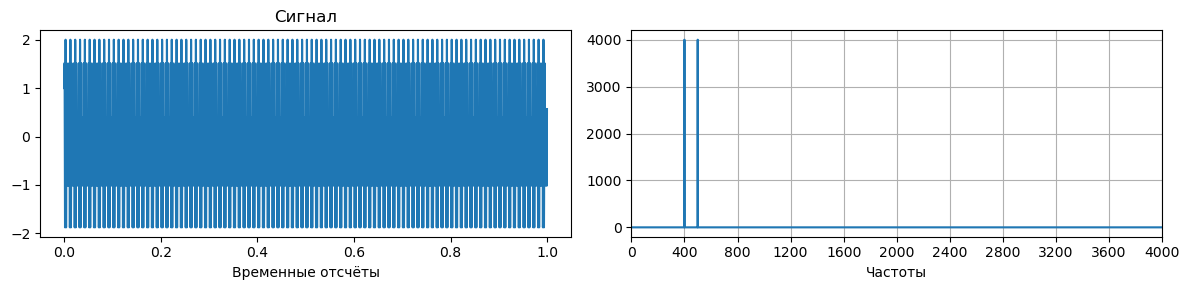

In [25]:
w1 = 500
w2 = 7600

t = np.linspace(0, 1, n, endpoint=False)
x = np.sin(2*np.pi*w1*t) + np.cos(2*np.pi*w2*t)

myDFT_AmplPlot(t, x, fs = fs)

In [27]:
import IPython
IPython.display.Audio(x,rate=fs)
#IPython.display.Audio("LetsGo.wav")

### Ешё пример

Сделаем пример сигнала с частотой дискретизации 44100 Гц.

In [29]:
from scipy.io import wavfile
from scipy import signal

samplerate, data = wavfile.read('source/example.wav')
# стерео канал в моно
#data = np.mean(data, axis = 1)
print("Частота дискретизации: ", samplerate)
T = len(data)/samplerate

Частота дискретизации:  44100


Сигнал представляет собой последовательные базовые частоты, растущие на один тон с течением времени.

In [31]:
fs = 44100
t = np.linspace(0, 1/2, 22050, endpoint=False)
w = 440
x = []
for i in np.arange(24):
    w_new = w * 2 ** (2*i/12)
    x = x + list(np.sin(2*np.pi*w_new*t))

len(x)

529200

In [33]:
import IPython
IPython.display.Audio(x,rate=fs)
#IPython.display.Audio("LetsGo.wav")

In [35]:
time = np.linspace(0., len(x)/fs, len(x))

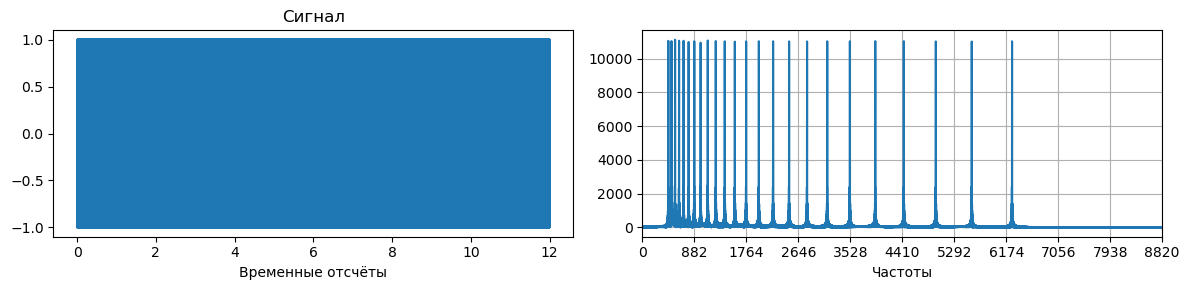

In [37]:
myDFT_AmplPlot(time, x, xLim = 0.2, fs = samplerate)

Теперь тот же сигнал, но с частотой дискретизации 8000 Гц.

In [39]:
fs = 8000
t = np.linspace(0, 1/2, 4000, endpoint=False)
w = 440
x = []
for i in np.arange(24):
    w_new = w * 2 ** (2*i/12)
    x = x + list(np.sin(2*np.pi*w_new*t))

len(x)

96000

In [41]:
import IPython
IPython.display.Audio(x,rate=fs)
#IPython.display.Audio("LetsGo.wav")

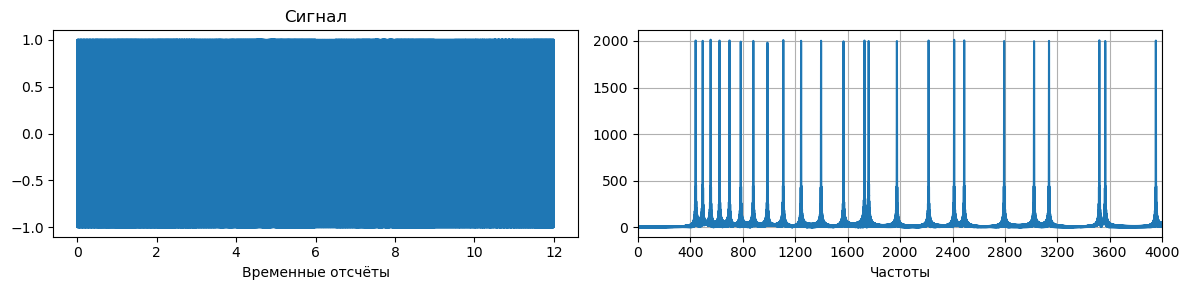

In [43]:
time = np.linspace(0., len(x)/fs, len(x))
myDFT_AmplPlot(time, x,fs = fs)

### 2D сигналы

Демострация алиасинга для изображений.

In [47]:
im = plt.imread('source/Alias.jpg')
print(im.shape)
im2 = im[::6,::6,:]
print(im2.shape)

(4160, 3120, 3)
(694, 520, 3)


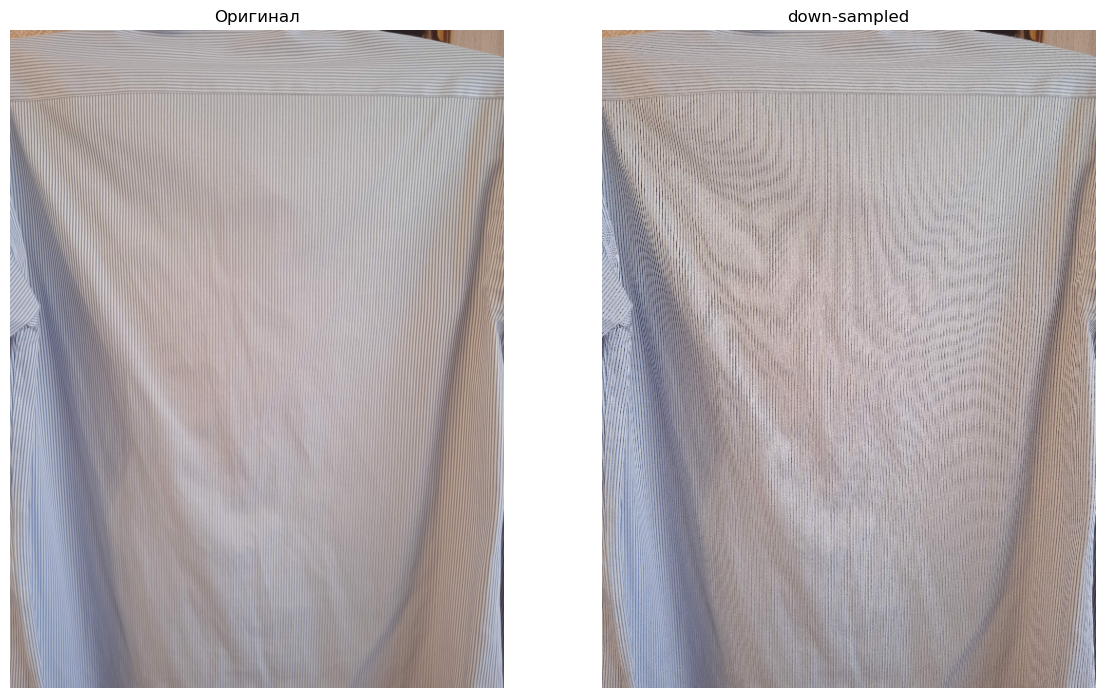

In [49]:
def plot_comparison(img_original, img_filtered, img_title_filtered, figsize=(14, 10)):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=figsize)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Оригинал')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')
    
plot_comparison(im,im2,'down-sampled')